# LiveLab | Build Up Nepal
<img src="https://ml8mzf2qdhvl.i.optimole.com/w:2000/h:915/q:mauto/https://www.buildupnepal.com/wp-content/uploads/2020/03/interlocking-brick-machine-mfrh-original-scaled.jpg"
     width="450"
     height="" />

Build Up Nepal is on a mission to break the vicious poverty cycle in rural Nepal through safe houses and long-term jobs for poor families. They recruit rural entrepreneurs and community groups to build safe, affordable, eco-friendly & sustainable brick homes.

Visualizing the impact data makes it possible for Build Up Nepal to communicate their impact to key stakeholders, including communities, government in Nepal, and funders. It will also help elevate the conversation about safe, hygienic housing in rural areas and the importance of prioritizing last mile infrastructure in development plans.

In this LiveLab, you'll help solve the problem of sub-standard, unsafe housing and poverty in rural Nepal by creating some awesome visualizations of Build Up Nepal’s data!

### The Data
You'll be using data from Build Up Nepal! The dataset is called `build-up-nepal.csv`.

Remember: to load this data and the libraries you'll need (pandas and plotly.express) into your Notebook, edit and run the following cells!

In [1]:
# import the pandas and plotly.express libraries
import pandas as pd
import plotly.express as px

In [3]:
# load the data
df = pd.read_csv('datasets/build-up-nepal.csv')

# preview the data
df.head()

,Name,District,Province Name,Gender,Start Date,Start Year,Status,Bricks produced,Houses built,Schools built,CO2 saved,Jobs (production),Jobs (construction),Total jobs,Description
0,Reconstruction with Save the Children,Dolakha,Bagmati Province,Male,2018-01-07,2018,Project,18500.0,5.0,NaN,56.055,NaN,NaN,0,We worked as technical partner for Save the ch...
1,Entrepreneurship driven reconstruction,Nuwakot,Bagmati Province,Male,2018-01-07,2018,Project,200000.0,80.0,2.0,606.000,NaN,NaN,0,Together with Practical Action we are starting...
2,School reconstruciton in Rabi Opi,Kavrepalanchok,Bagmati Province,Male,2018-01-02,2018,Project,14000.0,2.0,1.0,42.420,NaN,NaN,0,In beautiful Ravi Opi we are working as partne...
3,Training and school reconstruction in Jiri,Dolakha,Bagmati Province,Male,2018-01-04,2018,Project,12500.0,5.0,1.0,37.875,NaN,NaN,0,"In beautiful Jiri, Dolakha, we are serving as ..."
4,Community reconstruction in Dandagaun,Kathmandu,Bagmati Province,Male,2018-01-02,2018,Project,34000.0,12.0,NaN,103.020,NaN,NaN,0,"In Dandagaun, the community has taken the reco..."


### Task 1: Key Impact Metrics
There are **four key impact metrics** for Build Up Nepal:

1. Number of enterprises established and sustaining long-term

2. Number of houses built

3. Number of jobs created

4. Tonnes of CO2 emissions saved

**A.** To warm up calculate the number of enterprises established. What is the breakdown of their status?


In [9]:
# number of enterprises established
n_enterprises = len(df.index)
# print to screen
print(n_enterprises)

292


In [17]:
# calcualte the proportion of the statuses of enterprises
df.value_counts(['Status']) / n_enterprises

Status             
Running                0.630137
Project                0.205479
Struggling             0.065068
Closed / Sold          0.054795
recently started       0.020548
Data pending           0.010274
Project, Running       0.010274
Running, Struggling    0.003425
dtype: float64

**B.** Calculate the total number of houses built, the total number of jobs created, and the total tonnes of CO2 saved. Format and print to screen!

In [32]:
# jobs created:
df['Total jobs'].sum()

# houses built:
df['Houses built'].sum()

# tonnes of CO2 saved
df['CO2 saved'].sum()

44845.1514

## Task 2: Tracking metrics over time
Visualizing the number of houses built, jobs created, and tonnes of CO2 emissions saved each year, Build Up Nepal can evaluate the progress made towards their goals and measure the impact of their efforts!

**A.** Start by using the `px.histogram` function to visualize the total number of houses built each year. **Remember:** you'll need to use the `histfunc=` parameter!

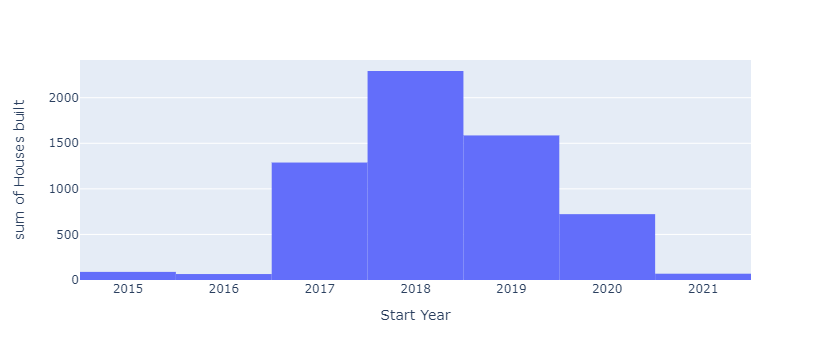

In [37]:
# plot houses built by year with the px.histogram function
px.histogram(df, x = 'Start Year', y = 'Houses built', histfunc = 'sum')

While the `histfunc=` parameter let us *aggregate* the total number of houses built year, we can make better use of the pandas `.groupby()` method, which allows us to group data based on one -- or more! -- columns.

**B.** Use the `.groupby()` to calculate the total number of houses build each year. Visualize the results now using the `px.bar` function!

In [43]:
# group number of houses built by year
houses = df.groupby('Start Year').agg({'Houses built': 'sum'}).reset_index()


# display groupby dataframe
houses

,Start Year,Houses built
0,2015,89.0
1,2016,65.4
2,2017,1288.6
3,2018,2292.8
4,2019,1586.0
5,2020,722.4
6,2021,69.0


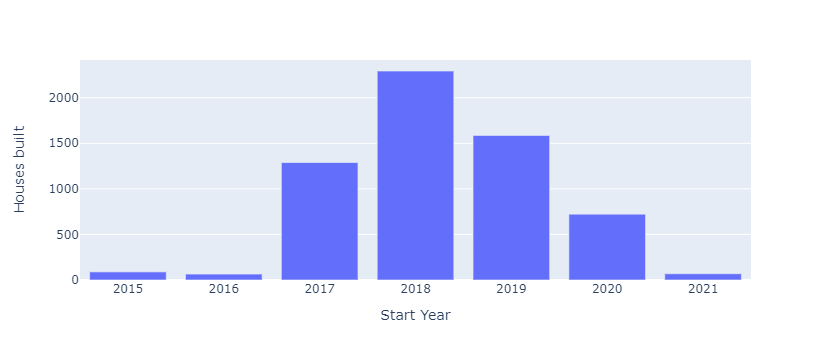

In [44]:
# plot houses built by year with the px.bar function
px.bar(houses, x = 'Start Year', y = 'Houses built')

**C.** Redo your .groupby() to include the total number of enterprises formed, the total number of houses built, the total number of jobs created, and the totally amount of CO2 emissions saved each year.

In [64]:
# create the aggregation dictionary
# remember: keys are the columns to aggregate,
# values are the aggregation to perform.
agg = {'Name' : 'count' , 'Houses built': 'sum', 'Total jobs' : 'sum', 'CO2 saved' : 'sum'}

# create groupby
groupby = df.groupby('Start Year').agg(agg).reset_index()

# rename 'Name' column to 'n_enterprises'
groupby = groupby.rename(columns = {'Name' : 'n_enterprises'})

# display groupby
groupby

,Start Year,n_enterprises,Houses built,Total jobs,CO2 saved
0,2015,2,89.0,0,824.1600
1,2016,9,65.4,0,565.0950
2,2017,31,1288.6,156,9680.8500
3,2018,56,2292.8,773,15866.2314
4,2019,76,1586.0,983,11820.3330
5,2020,86,722.4,963,5550.9600
6,2021,32,69.0,153,537.5220


**D.** Finally, create a bar chart to visulaize all four key impact metrics in a single chart.

**HINT:** To plot more than one column of a dataframe, the syntax will include `y=['Column 1', 'Column 2']` and you'll need to set `barmode='group'`.

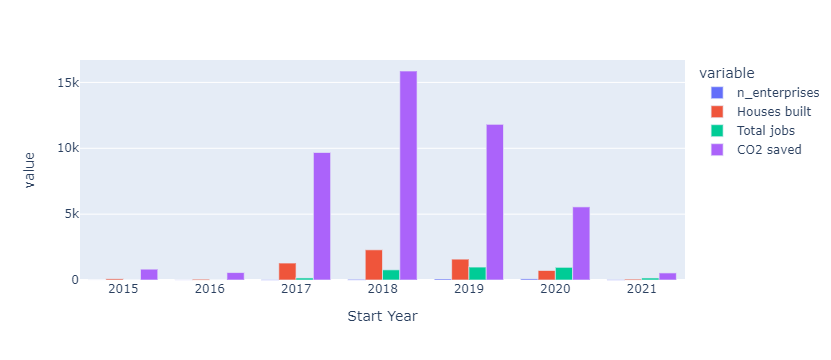

In [66]:
# plot number of houses built and CO2 saved by year
px.bar(groupby, x = 'Start Year', y = ['n_enterprises', 'Houses built', 'Total jobs', 'CO2 saved'], barmode = 'group')

## Task 3: Project Impact in each Province

Breaking down these metrics by the provinces of Nepal is helpful because it gives a closer look at how Build Up Nepal is making a difference *locally*, allowing them to adapt their actions to each area's unique requirements.

**A.** Next, group the total number of enterprises formed, the total number of houses built, the total number of jobs created, and the totally amount of CO2 emissions saved by each Province of Nepal.



In [70]:
# create the aggregation dictionary
# remember: keys are the columns to aggregate,
# values are the aggregation to perform.
agg = {'Name' : 'count' , 'Houses built': 'sum', 'Total jobs' : 'sum', 'CO2 saved' : 'sum'}

# create groupby
groupby2 = df.groupby('Province Name').agg(agg).reset_index()

# rename 'Name' column to 'n_enterprises'
groupby2 = groupby2.rename(columns = {'Name' : 'n_enterprises'})

# display groupby
groupby2

,Province Name,n_enterprises,Houses built,Total jobs,CO2 saved
0,Bagmati Province,120,2990.2,1068,22403.5170
1,Gandaki Province,48,1596.4,494,10599.1824
2,Karnali Province,10,222.0,176,1724.0700
3,Lumbini Province,34,408.0,455,3130.2930
4,Madhesh Province,13,136.0,107,1026.5640
5,Province No. 1,26,315.6,248,2575.5000
6,Province No. 2,1,36.0,27,272.7000
7,Sudurpashchim Province,40,409.0,453,3113.3250


**B.** Identify a province that has shown a well-balanced performance across all four metrics (enterprises, houses, jobs, CO2 emissions). What strategies or approaches might have contributed to this overall positive performance, and what lessons could other provinces learn from it?






Bagmati Province